In [3]:
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline 



In [12]:
Singapore = gpd.read_file('national-map-polygon-geojson.geojson')

In [13]:
Singapore['geometry']

0      POLYGON Z ((103.95641 1.33136 0.00000, 103.956...
1      POLYGON Z ((103.95745 1.31879 0.00000, 103.957...
2      POLYGON Z ((103.96068 1.32116 0.00000, 103.962...
3      POLYGON Z ((103.96265 1.32080 0.00000, 103.962...
4      POLYGON Z ((103.96283 1.31629 0.00000, 103.963...
                             ...                        
614    POLYGON Z ((103.81302 1.25343 0.00000, 103.813...
615    POLYGON Z ((103.86031 1.28649 0.00000, 103.860...
616    POLYGON Z ((103.89285 1.41512 0.00000, 103.893...
617    POLYGON Z ((103.85439 1.28825 0.00000, 103.854...
618    POLYGON Z ((103.75074 1.23570 0.00000, 103.754...
Name: geometry, Length: 619, dtype: geometry

<Axes: >

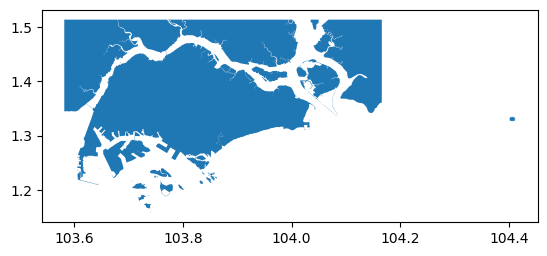

In [16]:
Singapore.plot()

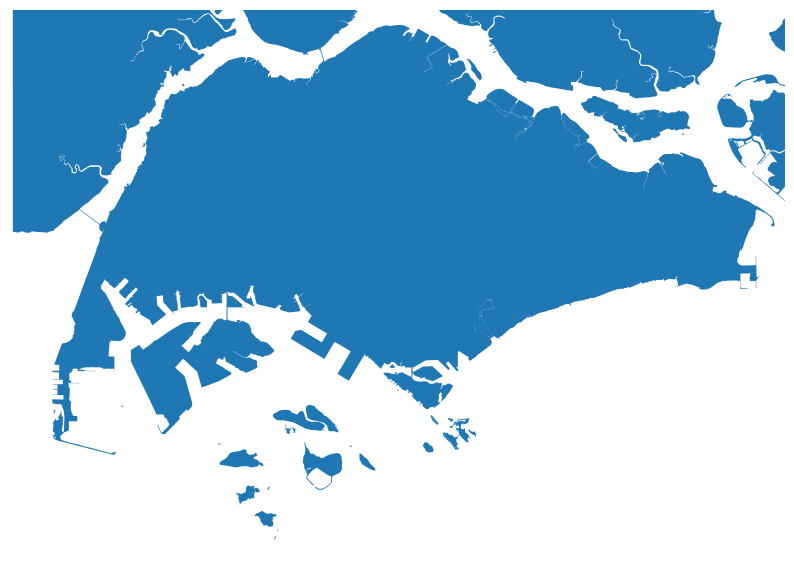

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
Singapore.plot(ax=ax)

ax.set_xlim(103.58, 104.05)
ax.set_ylim(1.15, 1.48)
ax.set_axis_off()

In [14]:
Singapore.geometry.name


'geometry'

FOLIUM 

In [3]:
import pandas as pd
import geopandas as gpd
import folium
import branca.colormap as cm
import pymysql

In [5]:
connection = pymysql.connect(host = '119.74.24.181', user = 'htx', password = 'Police123456', database = 'ASTRO')
df = pd.read_sql_query("SELECT * FROM astro.scam_management_system", connection)

C:\Users\clair\AppData\Local\Temp\ipykernel_30780\1768320547.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM astro.scam_management_system", connection)


In [6]:
#   Data Cleaning
df_division = df[['division_assigned']].copy()
df_division.dropna(subset = ['division_assigned'], inplace = True)
df_division = df_division[df_division.division_assigned != '-']
df_division = df_division.apply(lambda x: x.str.upper() if x.dtype == "object" else x)

values_to_be_replaced = ['CAD', 'ASCOM', 'CID']
for value in values_to_be_replaced:
    df_division = df_division.replace('.*{}.*'.format(value), value, regex=True)
df_division = df_division.replace(['ASCOM', 'ASD', 'CID', 'TCIB', 'UMSF', 'ICB', 'APD', 'ACB', 'GOIS'], 'A')

df_division = df_division.groupby('division_assigned').size().reset_index(name = 'No_of_cases_per_division')
df_division = df_division.drop(index = [0,4,5,7,9,12,13,15,16,17,18,19]) #  How to replace the values/group them together as some are vv stubborn
df_division = df_division.sort_values('No_of_cases_per_division', ascending = False)
df_division = df_division.reset_index(drop = True)

df_latlong = pd.DataFrame({'division_assigned': ['F', 'G', 'J', 'A', 'L', 'E', 'D', 'CAD'],
                        'latitude': ['1.3849575528196754', '1.3328211729396362', '1.3511672381459414', '1.2787649220017296', '1.4334351610154739', '1.3130793731128103', '1.3173533926882381', '1.278724700500034'],
                        'longitude': ['103.84533643093292', '103.93718201189469', '103.7023869984011', '103.8397629560721', '103.77890231189434', '103.8467156436066', '103.76671172354014', '103.8393872523757'],
                        'name': ['Ang Mo Kio Police Division HQ', 'Bedok Police Division HQ', 'Jurong Police Division HQ', 'Central Police Division HQ', 'Woodlands Police Division HQ', 'Tanglin Police Division HQ', 'Clementi Police Division HQ', 'Commercial Affairs Department']})
df_division = pd.merge(df_division, df_latlong, on = 'division_assigned')

lat_list = df_division['latitude'].tolist()
long_list = df_division['longitude'].tolist()
hq_list = df_division['name'].tolist()
scam_count_list = df_division['No_of_cases_per_division'].tolist()

In [18]:
#Centering it 


lat_list_float = [float(x) for x in lat_list]
long_list_float = [float(x) for x in long_list]
y_map= mean(lat_list_float)
x_map= mean(long_list_float)
print(x_map,y_map)

103.8195481660897 1.3362879391529423


In [20]:

from folium import Tooltip


mymap = folium.Map(location=[y_map, x_map], zoom_start=11,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)


for i in range(0, len(lat_list)):
    t = hq_list[i] + '<br>'+ str(scam_count_list[i])
    folium.Circle(
        location = [lat_list[i],long_list[i]],
        tooltip = Tooltip(t, style = 'font-size:15px'),
        radius = float(scam_count_list[i])*0.3,
        color = "#115fd4",
        opacity = 0.3,
        fill = True,
        fill_opacity = 0.3,
        fill_color = "#115fd4"
    ) .add_to(mymap)

mymap.save('map.html')